In [1]:
import matplotlib.pyplot as plt
import sys
from matplotlib import image

sys.path.append('../../diffusion')
from diffusion import Diffusion
from utils import normalize, denormalize


In [2]:
# Reading the image
img = image.imread("../images/cat.jpg")

# Normalizing the img to [-1, 1] range, since the noise will be sampled from a normal distribution
x0_l = normalize(img)
x0_c = normalize(img)

In [3]:
# Creating the diffusion model, setting the linear noise scheduler, running the forward diffusion process for different steps.
linear_diffusion = Diffusion(num_steps=1000, noise_scheduler='linear')
linear_diffusion.set_scheduler(beta_start=0.0001, beta_stop=0.02)
x200_l = linear_diffusion.forward_process(x0_l, 200)
x400_l = linear_diffusion.forward_process(x0_l, 400)
x600_l = linear_diffusion.forward_process(x0_l, 600)
x800_l = linear_diffusion.forward_process(x0_l, 800)
x1000_l = linear_diffusion.forward_process(x0_l, 1000)
xs_l = [x0_l, x200_l, x400_l, x600_l, x800_l, x1000_l]

In [4]:
# Creating the diffusion model, setting the cosine noise scheduler, running the forward diffusion process for different steps.
cosine_diffusion = Diffusion(num_steps=1000, noise_scheduler='cosine')
cosine_diffusion.set_scheduler(max_beta=0.999)
x200_c = cosine_diffusion.forward_process(x0_c, 200)
x400_c = cosine_diffusion.forward_process(x0_c, 400)
x600_c = cosine_diffusion.forward_process(x0_c, 600)
x800_c = cosine_diffusion.forward_process(x0_c, 800)
x1000_c = cosine_diffusion.forward_process(x0_c, 1000)
xs_c = [x0_c, x200_c, x400_c, x600_c, x800_c, x1000_c]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

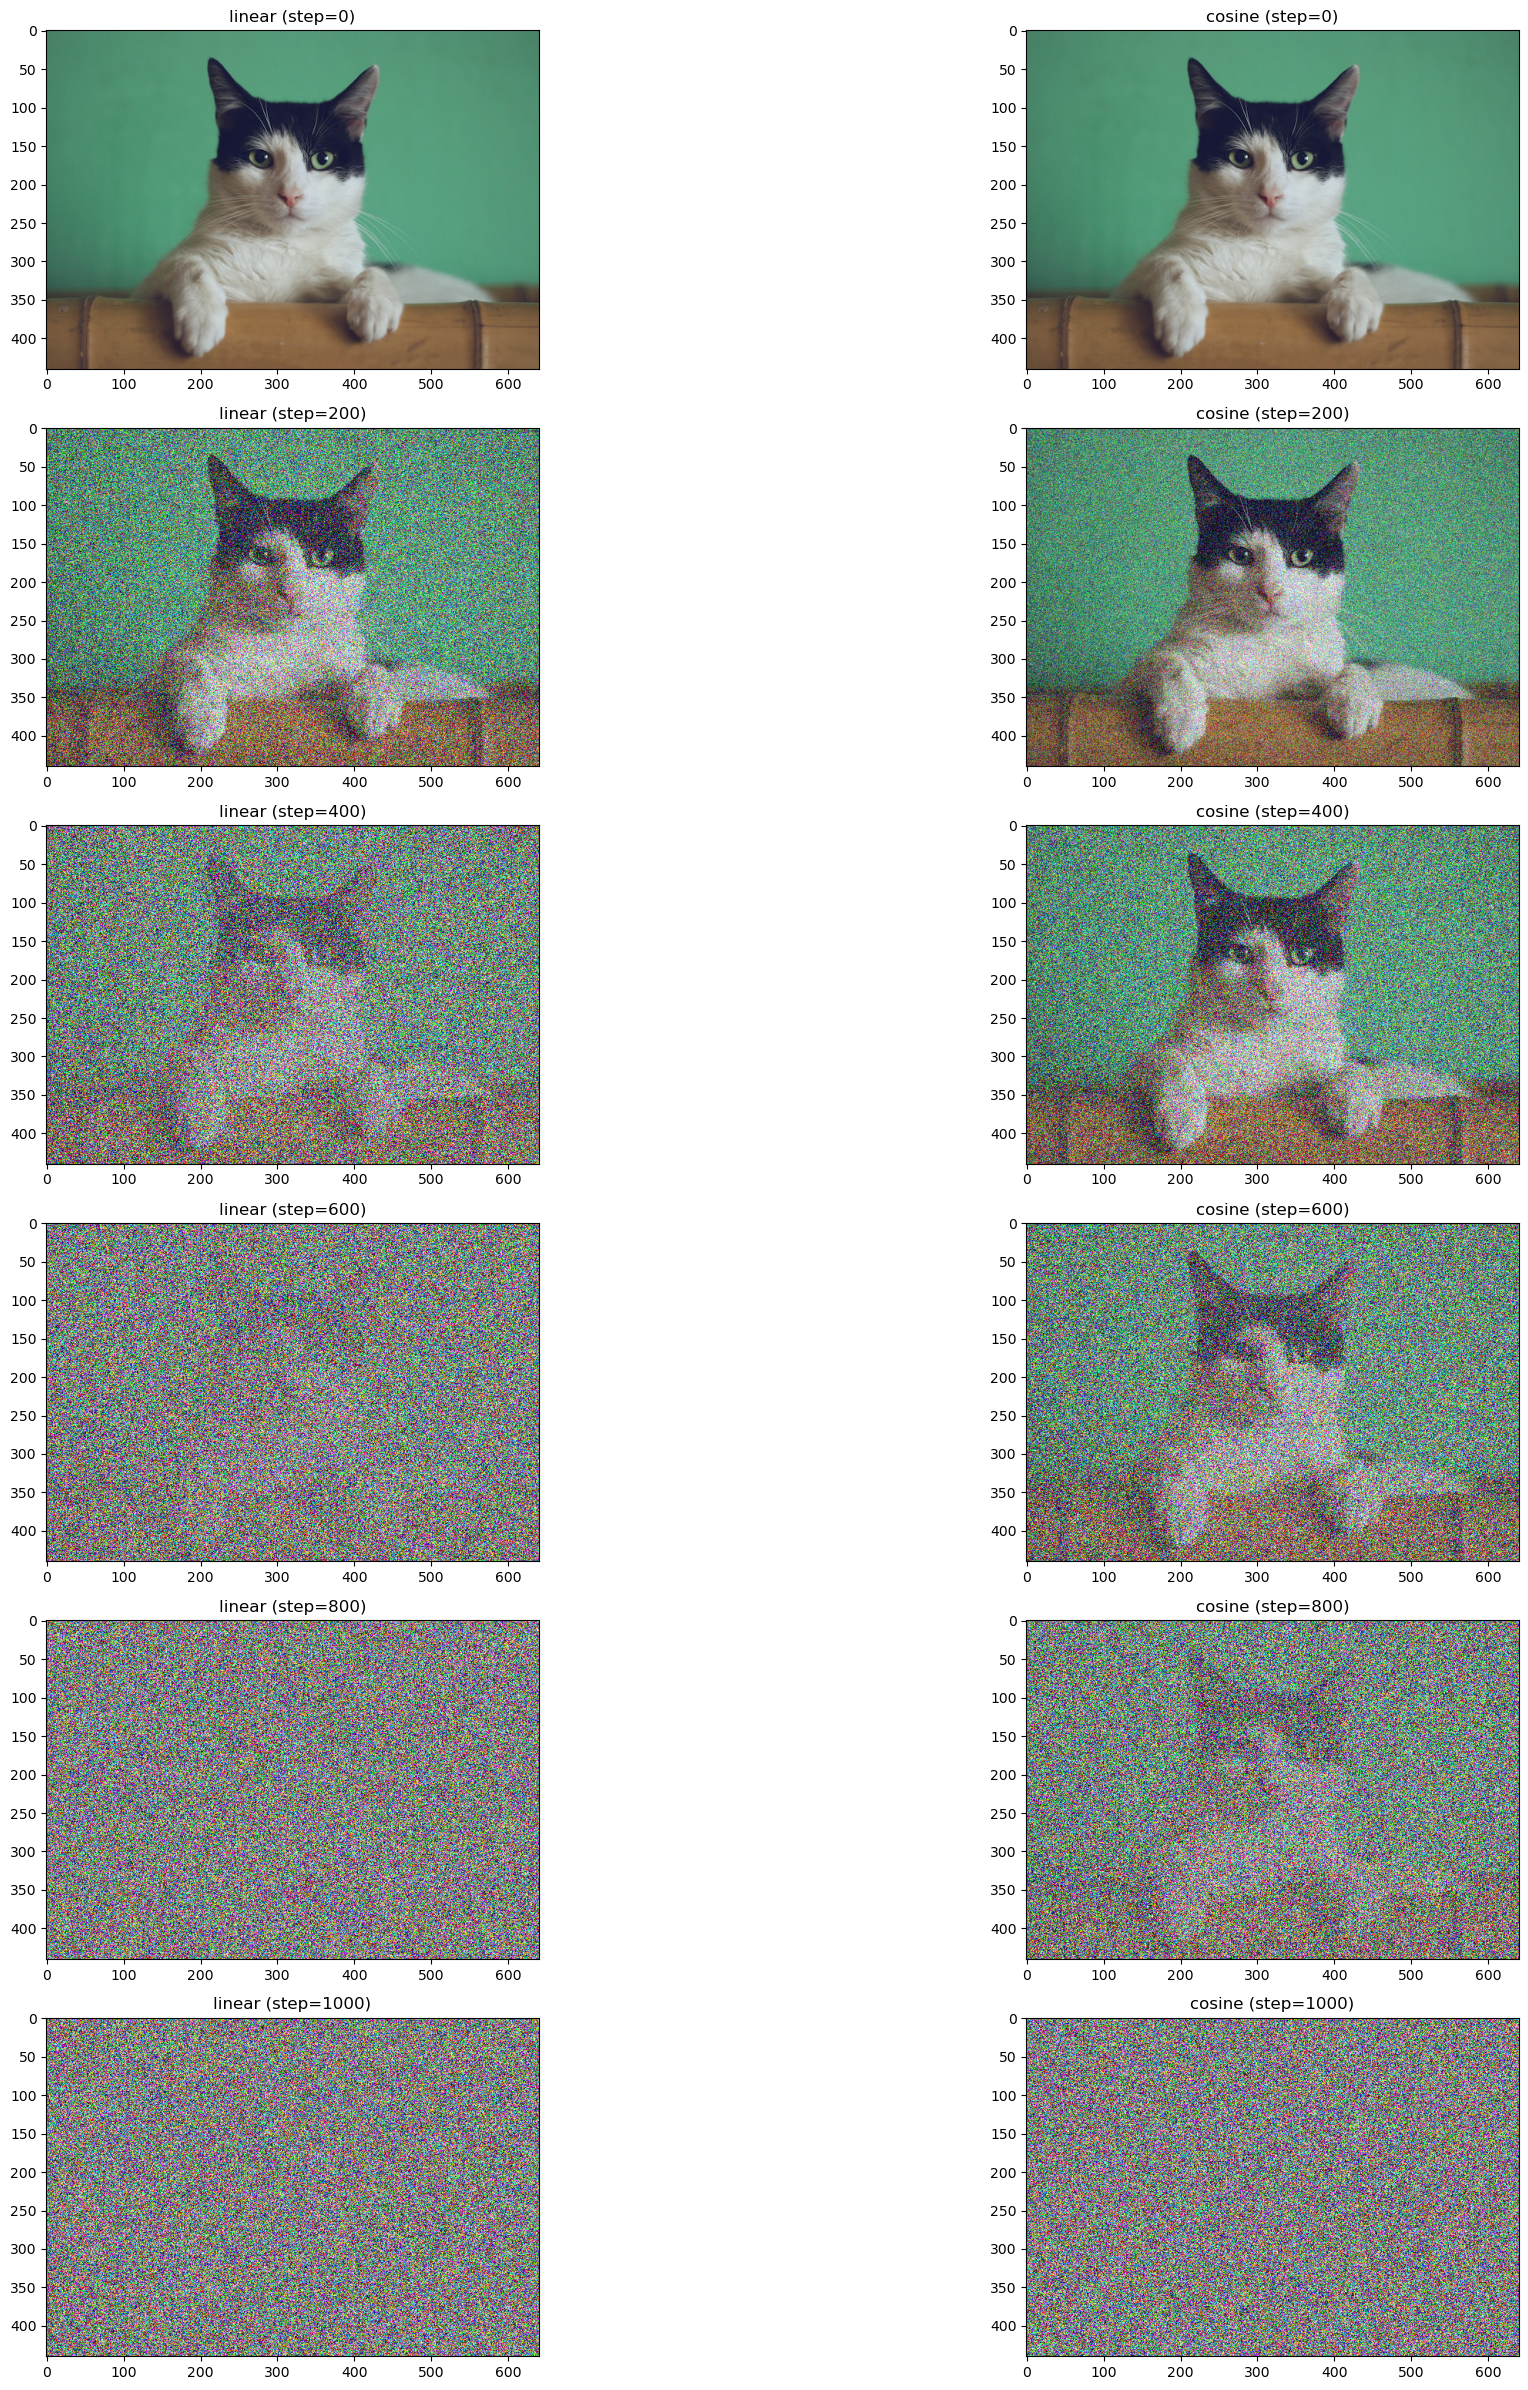

In [5]:
# Displaying noised images for different steps to compare the effects of linear and cosine noise scheduler.
fig = plt.figure(figsize=(24, 24))
for idx, (x_l, x_c) in enumerate(zip(xs_l, xs_c)):
    axl = fig.add_subplot(6, 2, 2*idx+1)
    axl.set_title(f"linear (step={200*idx})")
    plt.imshow(denormalize(x_l))

    axc = fig.add_subplot(6, 2, 2*idx+2)
    axc.set_title(f"cosine (step={200*idx})")
    plt.imshow(denormalize(x_c))

plt.tight_layout()
plt.show()